In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
ventas = pd.read_csv('vgsales.csv')

In [4]:
ventas.shape

(16598, 11)

In [5]:
ventas.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
ventas.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [7]:
ventas.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
ventas.Platform.value_counts().sum()

16598

In [9]:
ventas.Platform.value_counts().index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG',
       'PCFX'],
      dtype='object')

In [10]:
df = pd.DataFrame()
platform = []
sales = []

for j in ventas.Platform.value_counts().index:
    platform.append(j)

for j in ventas.Platform.value_counts():
    sales.append(j)

df['Platform'] = platform
df['Sales_percentage_from_total'] = sales/(ventas.Platform.value_counts().sum())*100
df.head()

,Platform,Sales_percentage_from_total
0,DS,13.031691
1,PS2,13.019641
2,PS3,8.006989
3,Wii,7.982890
4,X360,7.621400


In [11]:
df

,Platform,Sales_percentage_from_total
0,DS,13.031691
1,PS2,13.019641
2,PS3,8.006989
3,Wii,7.982890
4,X360,7.621400
5,PSP,7.308109
6,PS,7.205687
7,PC,5.783829
8,XB,4.964454
9,GBA,4.952404


<function matplotlib.pyplot.show(close=None, block=None)>

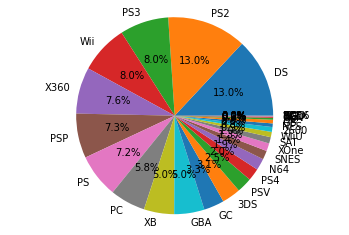

In [12]:
plt.pie(sales, labels=platform, autopct="%0.1f%%")
plt.axis('equal')
plt.show

In [13]:
ventas.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [14]:
ventas.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [15]:
action = ventas['Genre'] == 'Action' #Esta es una forma de hacer el filtro para ver sólo los de acción, haciendo un df nuevo
action_sales = ventas[action]
a = action_sales.groupby(['Name']).sum()
a.sort_values('Global_Sales', ascending=False)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,
Grand Theft Auto V,2182,10069.0,23.46,23.04,1.39,8.03,55.92
Grand Theft Auto: San Andreas,12844,8022.0,10.77,1.96,0.41,10.72,23.86
Grand Theft Auto IV,2468,6024.0,11.53,7.65,0.58,2.73,22.47
Grand Theft Auto: Vice City,13759,4005.0,8.41,5.52,0.47,1.79,16.19
FIFA Soccer 13,27327,16096.0,2.64,10.25,0.23,3.03,16.16
...,...,...,...,...,...,...,...
Dance with Devils,16370,2016.0,0.00,0.00,0.01,0.00,0.01
Fireman Sam: Action Stations,16304,2013.0,0.00,0.01,0.00,0.00,0.01
Legoland,16198,1999.0,0.00,0.01,0.00,0.00,0.01


In [16]:
ventas.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
2D Boy                             1
Extreme Entertainment Group        1
Piacci                             1
Graphsim Entertainment             1
Imax                               1
Name: Publisher, Length: 578, dtype: int64

In [17]:
ea = ventas['Publisher'] == 'Electronic Arts'
ea_sales = ventas[ea]
e = ea_sales.groupby(['Genre','Platform']).sum()
e.sort_values('Global_Sales', ascending=False)

Rank      Year  NA_Sales  EU_Sales  JP_Sales  \
Genre        Platform                                                   
Sports       PS2       335468  202449.0     80.57     30.22      1.38   
             PS3       240405  128655.0     33.54     31.21      0.61   
             X360      287187  146702.0     47.52     21.79      0.15   
Racing       PS2       129414   58095.0     20.36     13.42      0.54   
Shooter      X360       54457   44231.0     24.58     11.23      0.41   
...                       ...       ...       ...       ...       ...   
Fighting     DS         11281    2005.0      0.08      0.00      0.00   
Simulation   SAT        11283    1994.0      0.00      0.00      0.08   
Strategy     XB         11338    2003.0      0.06      0.02      0.00   
Role-Playing DS         12254    2007.0      0.06      0.00      0.00   
Misc         GC         13050    2002.0      0.04      0.01      0.00   

                       Other_Sales  Global_Sales  
Genre        Platform                             
Sports       PS2             22.91        135.11  
             PS3             12.17         77.56  
             X360             6.42         75.98  
Racing       PS2              7.28         41.56  
Shooter      X360             3.57         39.85  
...                            ...           ...  
Fighting     DS               0.01          0.08  
Simulation   SAT              0.00          0.08  
Strategy     XB               0.00          0.08  
Role-Playing DS               0.01          0.06  
Misc         GC               0.00          0.05  

[137 rows x 7 columns]

In [18]:
ventas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [19]:
print("North America: ", round(ventas.NA_Sales.sum(),2))
print("Europe: ", round(ventas.EU_Sales.sum(),2))
print("Japan: ", round(ventas.JP_Sales.sum(),2))
print("Others: ", round(ventas.Other_Sales.sum(),2))

North America:  4392.95
Europe:  2434.13
Japan:  1291.02
Others:  797.75


In [20]:
na = ventas.groupby(['Genre', 'Platform']).sum()
na.sort_values('NA_Sales', ascending=False)

,,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,Platform,,,,,,,
Shooter,X360,1220584,395942.0,174.22,76.59,3.10,24.53,278.55
Sports,Wii,1904586,514307.0,151.77,94.99,18.25,27.06,292.06
Action,X360,2014963,639254.0,141.39,76.81,2.77,21.63,242.67
Sports,PS2,2501764,783675.0,134.12,69.96,24.74,44.66,273.41
Action,PS2,2223430,691671.0,127.82,71.44,25.81,47.64,272.76
...,...,...,...,...,...,...,...,...
Platform,GG,13527,1992.0,0.00,0.00,0.04,0.00,0.04
Sports,SAT,147122,31939.0,0.00,0.00,2.79,0.00,2.79
Shooter,TG16,15538,1995.0,0.00,0.00,0.02,0.00,0.02


In [21]:
ventas.corr(method='pearson')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [22]:
ventas.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


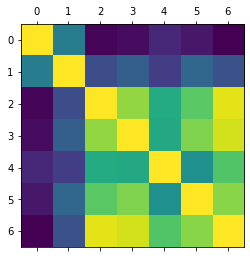

In [23]:
plt.matshow(ventas.corr())

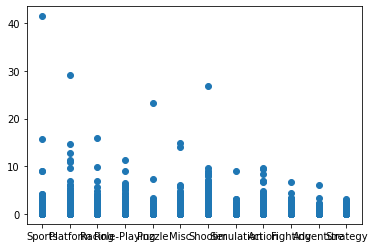

In [42]:
x = ventas['Genre']
y = ventas['NA_Sales']
plt.scatter(x, y)